In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import sys
import cv2 as cv
from tqdm import tqdm
tqdm.pandas()

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord

import scipy.stats.distributions as dist

plt.rcParams['font.size'] = 14

In [73]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users~/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'
cos_dat_fold = 'E:/cosmos-data'

### Importing My Data

In [74]:
df_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full-rem-seps-z.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [75]:
df_cat

,ID,ORyanID_23,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,816891,4000705532455,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,860686,4000705533383,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,1.571297e-06,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,1301188,4000705539941,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-2.881107e-06,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,1304538,4000705540034,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-6.036952e-06,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,1310001,4000705540064,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-1.023530e-05,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,1520733,4001204758614_extra,stage4,149.891374,2.866981,28107.876953,37826.437500,0.000086,0.000104,-9.313976e-07,...,-9.441206,-9.279022,-9.095134,-9.003501,-8.955496,0.120441,0.213251,0.306832,0.556012,0.731876
3928,1520749,4546055995_extra,stage2,150.383110,2.865367,16320.103516,37787.917969,0.000131,0.000236,7.123858e-05,...,-9.857880,-9.658215,-9.485625,-9.235816,-8.971795,0.162147,0.238640,0.432004,0.592193,0.687256
3929,1523385,4000927318133_extra,stage3,149.789910,2.865132,30540.179688,37782.648438,0.000045,0.000059,1.600747e-05,...,-9.525900,-9.472779,-9.353454,-9.273221,-9.213521,0.262676,0.355466,0.410356,0.489105,0.566003
3930,1524909,4000747939904_extra,stage3,150.450581,2.872371,14702.710938,37956.468750,0.000248,0.000292,7.378556e-06,...,-9.556987,-9.385500,-9.154130,-9.026810,-8.938077,0.153294,0.283249,0.436332,0.600615,0.693621


In [76]:
df_cat.head()

,ID,ORyanID_23,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,816891,4000705532455,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-0.000010,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,860686,4000705533383,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,0.000002,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,1301188,4000705539941,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-0.000003,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,1304538,4000705540034,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-0.000006,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,1310001,4000705540064,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-0.000010,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279


In [90]:
df_red_tmp = df_cat.query('ez_sfr < 10')
df_red = df_red_tmp.query('lp_mass_best >= 9.25 & lp_mass_best <= 12.5')

In [91]:
df_red

,ID,ORyanID_23,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,816891,4000705532455,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,860686,4000705533383,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,1.571297e-06,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
3,1304538,4000705540034,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-6.036952e-06,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,1310001,4000705540064,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-1.023530e-05,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279
5,1308927,4000705540104,stage3,149.688716,2.661469,32967.476562,32894.925781,0.000027,0.000027,-7.739382e-06,...,-8.919805,-8.915024,-8.908461,-8.900943,-8.896926,0.886180,0.922628,0.971381,1.015397,1.057468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,1520733,4001204758614_extra,stage4,149.891374,2.866981,28107.876953,37826.437500,0.000086,0.000104,-9.313976e-07,...,-9.441206,-9.279022,-9.095134,-9.003501,-8.955496,0.120441,0.213251,0.306832,0.556012,0.731876
3928,1520749,4546055995_extra,stage2,150.383110,2.865367,16320.103516,37787.917969,0.000131,0.000236,7.123858e-05,...,-9.857880,-9.658215,-9.485625,-9.235816,-8.971795,0.162147,0.238640,0.432004,0.592193,0.687256
3929,1523385,4000927318133_extra,stage3,149.789910,2.865132,30540.179688,37782.648438,0.000045,0.000059,1.600747e-05,...,-9.525900,-9.472779,-9.353454,-9.273221,-9.213521,0.262676,0.355466,0.410356,0.489105,0.566003
3930,1524909,4000747939904_extra,stage3,150.450581,2.872371,14702.710938,37956.468750,0.000248,0.000292,7.378556e-06,...,-9.556987,-9.385500,-9.154130,-9.026810,-8.938077,0.153294,0.283249,0.436332,0.600615,0.693621


In [92]:
def get_redshift(ez_z, lp_z):
    if np.isnan(ez_z):
        if not np.isnan(lp_z):
            return lp_z
        else:
            return np.nan
    
    if np.isnan(lp_z):
        if not np.isnan(ez_z):
            return ez_z
        else:
            return np.nan
    
    if lp_z < ez_z:
        return lp_z
    elif ez_z <= lp_z:
        return ez_z
    else:
        return 'what'

In [93]:
df_extra_tmp = (
    df_red
    .assign(redshift = df_red.apply(lambda row: get_redshift(row.ez_z_phot,row.lp_zBEST), axis = 1))
)

df_extra_rem = (
    df_extra_tmp.query('redshift <= 1.2')
)

In [94]:
df_extra_rem

,ID,ORyanID_23,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975,redshift
0,816891,4000705532455,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,...,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330,0.519525
1,860686,4000705533383,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,1.571297e-06,...,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098,1.124400
3,1304538,4000705540034,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-6.036952e-06,...,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727,1.024009
4,1310001,4000705540064,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-1.023530e-05,...,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279,0.486400
5,1308927,4000705540104,stage3,149.688716,2.661469,32967.476562,32894.925781,0.000027,0.000027,-7.739382e-06,...,-8.915024,-8.908461,-8.900943,-8.896926,0.886180,0.922628,0.971381,1.015397,1.057468,0.695800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,1520733,4001204758614_extra,stage4,149.891374,2.866981,28107.876953,37826.437500,0.000086,0.000104,-9.313976e-07,...,-9.279022,-9.095134,-9.003501,-8.955496,0.120441,0.213251,0.306832,0.556012,0.731876,0.484922
3928,1520749,4546055995_extra,stage2,150.383110,2.865367,16320.103516,37787.917969,0.000131,0.000236,7.123858e-05,...,-9.658215,-9.485625,-9.235816,-8.971795,0.162147,0.238640,0.432004,0.592193,0.687256,0.647512
3929,1523385,4000927318133_extra,stage3,149.789910,2.865132,30540.179688,37782.648438,0.000045,0.000059,1.600747e-05,...,-9.472779,-9.353454,-9.273221,-9.213521,0.262676,0.355466,0.410356,0.489105,0.566003,0.301645
3930,1524909,4000747939904_extra,stage3,150.450581,2.872371,14702.710938,37956.468750,0.000248,0.000292,7.378556e-06,...,-9.385500,-9.154130,-9.026810,-8.938077,0.153294,0.283249,0.436332,0.600615,0.693621,0.855695


### Reducing DataFrame

In [82]:
df_ra_dec = (
    df_extra_rem
    [['ORyanID_23', 'ID', 'category', 'ALPHA_J2000', 'DELTA_J2000', 'ez_z_phot', 'lp_zBEST', 'lp_mass_best', 'ez_sfr']]
)

In [83]:
def getting_duplicates(id_str, df):
    
    check = len(df.query('ORyanID_23 == @id_str'))
    if check > 1.5:
        return 'y'
    else:
        return 'n'

In [84]:
def picking_z(ez_z, lp_z):
    if np.isnan(ez_z):
        if not np.isnan(lp_z):
            return lp_z
        else:
            return np.nan
    
    if np.isnan(lp_z):
        if not np.isnan(ez_z):
            return ez_z
        else:
            return np.nan
    
    if lp_z < ez_z:
        return lp_z
    elif ez_z <= lp_z:
        return ez_z
    else:
        return 'what'

### Finding Duplicates

In [85]:
df_checked = (
    df_ra_dec
    .assign(coords = df_ra_dec.apply(lambda row: SkyCoord(ra = row.ALPHA_J2000 * u.deg, dec = row.DELTA_J2000 * u.deg, frame = 'fk5'), axis = 1))
    .assign(filt = df_ra_dec.ORyanID_23.apply(lambda x: getting_duplicates(x, df_ra_dec)))
    .assign(z = df_ra_dec.apply(lambda row: picking_z(row.ez_z_phot, row.lp_zBEST), axis = 1))
)

In [86]:
df_filt = df_checked.query('filt == "y"').drop(columns = ['ez_z_phot', 'lp_zBEST'])
df_filt

,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,lp_mass_best,ez_sfr,coords,filt,z
7,4000705540519,1324712,stage1,149.696134,2.679032,8.85961,-0.291023,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.283853
11,4000705547180,1264241,stage1,150.319695,2.618060,10.53484,1.474177,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.982027
12,4000706649921,844303,stage3,150.059115,2.219933,11.05237,2.547000,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,1.118725
19,4000708130489,514557,stage3,149.997800,1.913435,9.19611,-0.478965,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.331300
22,4000711650343,1084532,stage3,149.957283,2.438351,10.47155,-0.958259,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.357000
...,...,...,...,...,...,...,...,...,...,...
3925,4546055995_extra,1519536,stage3,150.381262,2.867551,9.41503,0.294519,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.683219
3926,4000747939904_extra,1520609,stage1,150.455472,2.867004,10.91445,1.285561,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.864934
3928,4546055995_extra,1520749,stage2,150.383110,2.865367,9.50357,0.507741,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.647512
3929,4000927318133_extra,1523385,stage3,149.789910,2.865132,9.53909,0.406027,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.301645


In [87]:
bool_ser = df_filt.duplicated(subset='ORyanID_23', keep='first')

In [88]:
df_prim = (
    df_filt[bool_ser]
    .drop(columns = 'filt')
    .rename(columns = {'ORyanID_23': 'ORyan23_ID_1','ID': 'ID_Prim', 'category' : 'prim_cat', 'ALPHA_J2000': 'Prim_RA','DELTA_J2000' : 'Prim_Dec', 'coords' : 'prim_coords', 'z' : 'z_prim', 'ez_sfr':'ez_sfr_prim','lp_mass_best':'lp_mass_best_prim'})
)
df_sec = (
    df_filt[~bool_ser]
    .drop(columns = 'filt')
    .rename(columns = {'ORyanID_23': 'ORyan23_ID_2', 'ID': 'ID_Sec', 'category' : 'sec_cat', 'ALPHA_J2000': 'Sec_RA','DELTA_J2000' : 'Sec_Dec', 'coords' : 'sec_coords', 'z' : 'z_sec', 'ez_sfr':'ez_sfr_sec','lp_mass_best':'lp_mass_best_sec'})
)

In [89]:
df_prim_sec = (
    df_prim.merge(df_sec, left_on = 'ORyan23_ID_1', right_on = 'ORyan23_ID_2', how = 'left')
)
df_prim_sec

,ORyan23_ID_1,ID_Prim,prim_cat,Prim_RA,Prim_Dec,lp_mass_best_prim,ez_sfr_prim,prim_coords,z_prim,ORyan23_ID_2,ID_Sec,sec_cat,Sec_RA,Sec_Dec,lp_mass_best_sec,ez_sfr_sec,sec_coords,z_sec
0,4000705540519,1324784,stage1,149.699231,2.679556,8.57956,-0.783763,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.303057,4000705540519,1324712,stage1,149.696134,2.679032,8.85961,-0.291023,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.283853
1,4000705547180,1266054,stage1,150.320392,2.620598,10.60467,0.997192,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.995600,4000705547180,1264241,stage1,150.319695,2.618060,10.53484,1.474177,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.982027
2,4000706649921,840582,stage3,150.061821,2.218277,10.84630,1.745799,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",1.152400,4000706649921,844303,stage3,150.059115,2.219933,11.05237,2.547000,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",1.118725
3,4000708130489,515281,stage3,150.000868,1.910666,10.49449,-0.176107,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.336500,4000708130489,514557,stage3,149.997800,1.913435,9.19611,-0.478965,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.331300
4,4000711650343,1082084,stage3,149.956640,2.441887,9.88246,-0.218701,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.318100,4000711650343,1084532,stage3,149.957283,2.438351,10.47155,-0.958259,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.357000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,4001185630514_extra,1519437,stage1,150.151511,2.859398,9.57472,0.335857,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.304915,4001185630514_extra,1515868,stage1,150.150662,2.861592,9.42313,-0.188211,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.343894
978,4000747939904_extra,1520609,stage1,150.455472,2.867004,10.91445,1.285561,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.864934,4000747939904_extra,1517629,stage1,150.452540,2.867322,8.42521,-0.133578,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.839582
979,4546055995_extra,1520749,stage2,150.383110,2.865367,9.50357,0.507741,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.647512,4546055995_extra,1519536,stage3,150.381262,2.867551,9.41503,0.294519,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.683219
980,4000927318133_extra,1523385,stage3,149.789910,2.865132,9.53909,0.406027,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.301645,4000927318133_extra,1518052,stage1,149.788992,2.862534,9.76102,-0.008446,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.300975


In [33]:
df_check = (
    df_prim_sec
    .assign(check = df_prim_sec.apply(lambda row: 'n' if row.ORyan23_ID_1 != row.ORyan23_ID_2 else 'y', axis = 1))
)

In [34]:
df_check.check.value_counts()

y    663
Name: check, dtype: int64

### Checking Z-Differences

In [35]:
df_check.prim_cat.value_counts()

stage1    271
stage3    263
stage2    105
stage4     24
Name: prim_cat, dtype: int64

In [36]:
df_z_check = (
    df_prim_sec
    .assign(z_diff = df_prim_sec.apply(lambda row: row.z_prim - row.z_sec, axis = 1))
)

In [37]:
len(df_z_check)

663

In [40]:
df_z_checked = df_z_check.query('z_diff >= -0.06 and z_diff <= 0.06')

In [41]:
df_z_checked

,ORyan23_ID_1,ID_Prim,prim_cat,Prim_RA,Prim_Dec,lp_mass_best_prim,ez_sfr_prim,prim_coords,z_prim,ORyan23_ID_2,ID_Sec,sec_cat,Sec_RA,Sec_Dec,lp_mass_best_sec,ez_sfr_sec,sec_coords,z_sec,z_diff
0,4000705547180,1266054,stage1,150.320392,2.620598,10.60467,0.997192,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.995600,4000705547180,1264241,stage1,150.319695,2.618060,10.53484,1.474177,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.982027,0.013573
1,4000706649921,840582,stage3,150.061821,2.218277,10.84630,1.745799,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",1.152400,4000706649921,844303,stage3,150.059115,2.219933,11.05237,2.547000,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",1.118725,0.033675
2,4000711650343,1082084,stage3,149.956640,2.441887,9.88246,-0.218701,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.318100,4000711650343,1084532,stage3,149.957283,2.438351,10.47155,-0.958259,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.357000,-0.038900
4,4000715723468,905466,stage2,150.393574,2.277410,9.69328,0.313347,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.588741,4000715723468,906155,stage2,150.393725,2.277155,9.29240,0.189951,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.616283,-0.027541
5,4000716471646,525542,stage3,149.911651,1.925283,9.77660,0.161122,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.747600,4000716471646,525280,stage3,149.912175,1.923344,11.05605,0.543224,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.774127,-0.026527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,4000775195831_extra,1494892,stage1,150.515110,2.842889,10.90264,1.590030,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.864567,4000775195831_extra,1492652,stage1,150.512395,2.842031,9.83544,1.005306,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.871082,-0.006515
659,4001185630514_extra,1519437,stage1,150.151511,2.859398,9.57472,0.335857,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.304915,4001185630514_extra,1515868,stage1,150.150662,2.861592,9.42313,-0.188211,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.343894,-0.038978
660,4546055995_extra,1520749,stage2,150.383110,2.865367,9.50357,0.507741,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.647512,4546055995_extra,1519536,stage3,150.381262,2.867551,9.41503,0.294519,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.683219,-0.035707
661,4000927318133_extra,1523385,stage3,149.789910,2.865132,9.53909,0.406027,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.301645,4000927318133_extra,1518052,stage1,149.788992,2.862534,9.76102,-0.008446,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.300975,0.000670


In [42]:
# df_z_checked.to_csv(f'{combine_fold}/primary-secondary-z-checked.csv')

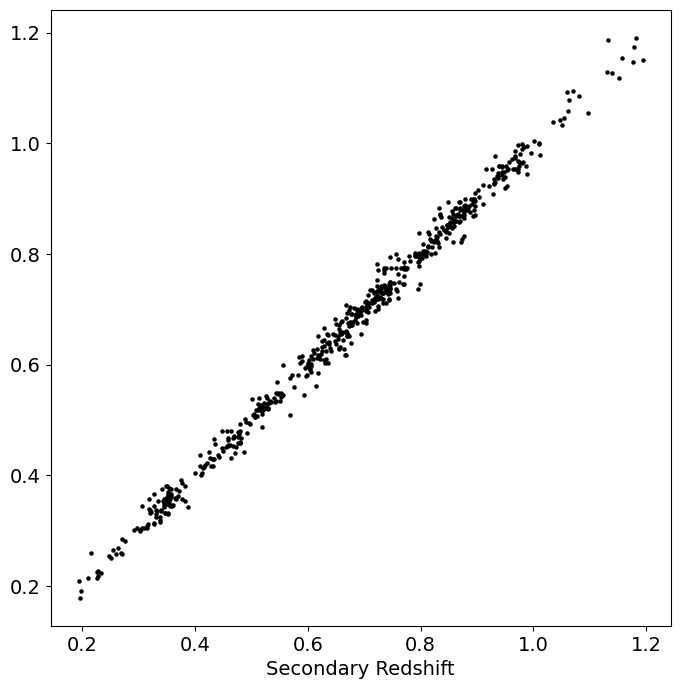

In [45]:
plt.figure(figsize = (8,8))
plt.scatter(df_z_checked.z_prim, df_z_checked.z_sec, s = 5, color = 'black')
plt.xlabel('Primary Redshift')
plt.xlabel('Secondary Redshift')

plt.show()

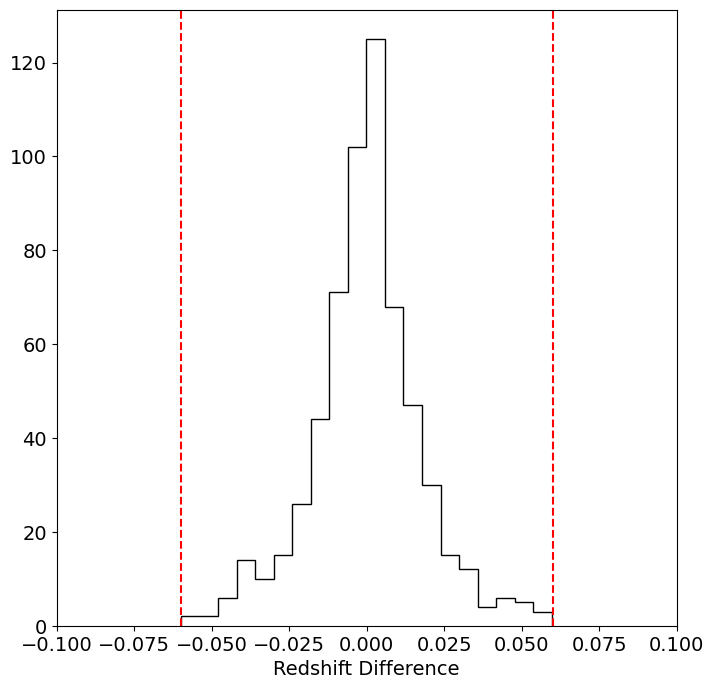

In [46]:
plt.figure(figsize = (8,8))
plt.hist(df_z_checked.z_diff, bins = 20, color = 'black', histtype='step')
plt.xlabel('Redshift Difference')
plt.axvline(-0.06, color = 'red', linestyle='--')
plt.axvline(0.06, color = 'red', linestyle='--')
plt.xlim([-0.1,0.1])
plt.show()

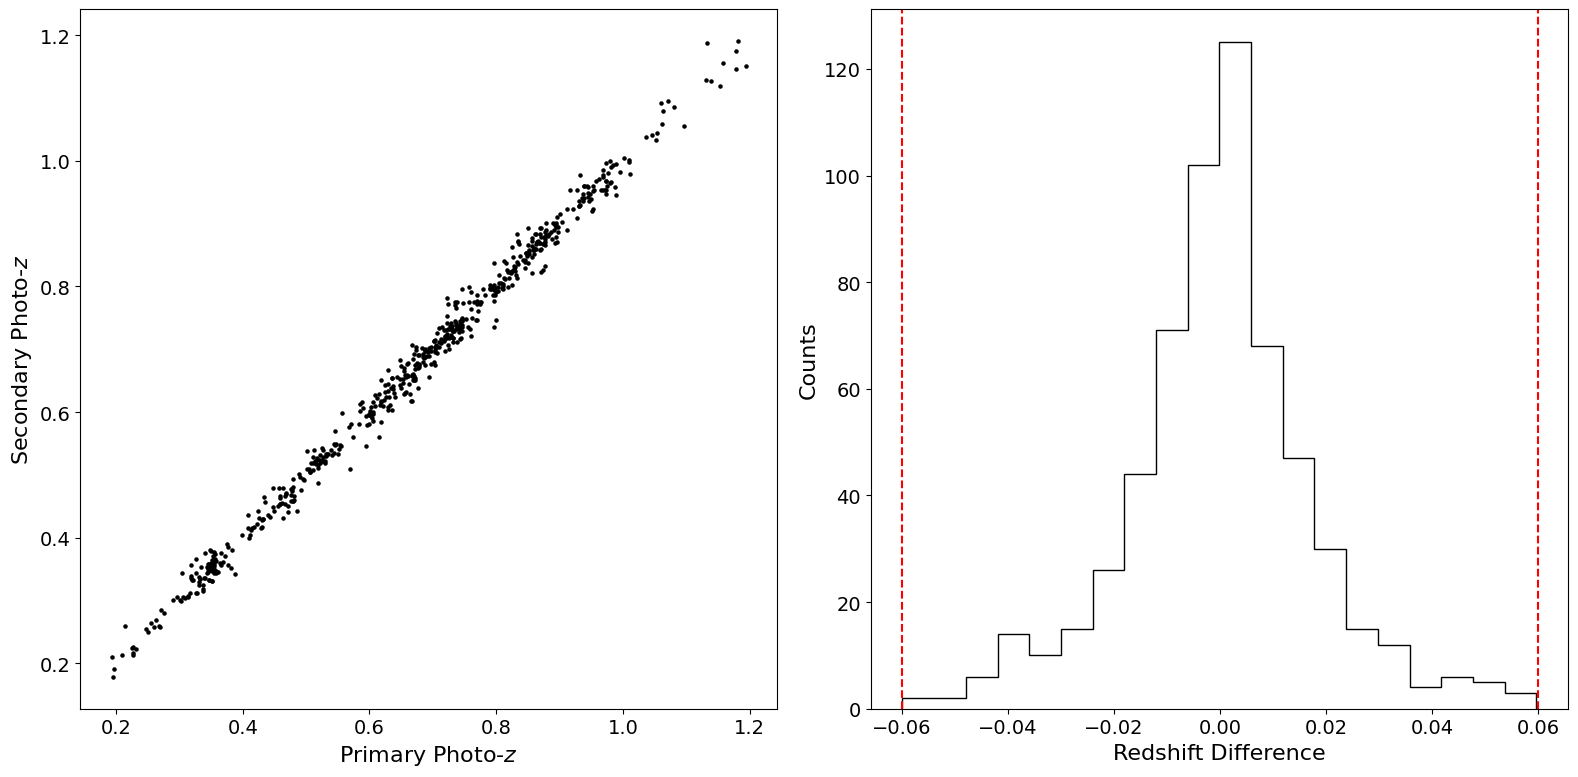

In [47]:
fig, ax = plt.subplots(ncols = 2, figsize = (16, 8))
ax[0].scatter(df_z_checked.z_prim, df_z_checked.z_sec, s = 5, color = 'black')
ax[0].set_xlabel('Primary Photo-$z$', fontsize = 16)
ax[0].set_ylabel('Secondary Photo-$z$', fontsize = 16)

ax[1].hist(df_z_checked.z_diff, bins = 20, color = 'black', histtype='step')
ax[1].axvline(-0.06, color = 'red', linestyle='--')
ax[1].axvline(0.06, color = 'red', linestyle='--')
ax[1].set_xlabel('Redshift Difference', fontsize = 16)
ax[1].set_ylabel('Counts', fontsize = 16)

fig.tight_layout()
# fig.savefig(f'{fig_folder}/redshift_scatter.pdf', bbox_inches = 'tight', dpi = 500)
plt.show()

In [49]:
df_z_checked.prim_cat.value_counts()

stage1    253
stage3    241
stage2     94
stage4     19
Name: prim_cat, dtype: int64

### Getting Projected Separations

In [54]:
cosmo = FlatLambdaCDM(H0=70.0 * u.km / (u.Mpc * u.s), Om0=0.3, Tcmb0=2.725 * u.K)

In [55]:
def calc_seps(prim_ra, prim_dec, sec_ra, sec_dec, z1, z2, cosmo):
    z = (z1 + z2) / 2
    
    prim_coord = SkyCoord(ra = prim_ra * u.deg, dec = prim_dec * u.deg, frame = 'fk5')
    sec_coord = SkyCoord(ra = sec_ra * u.deg, dec = sec_dec * u.deg, frame = 'fk5')
    
    sep = (prim_coord.separation(sec_coord)).to(u.arcmin)
    
    conversion = cosmo.kpc_proper_per_arcmin(z)
    
    proj_dist = (sep * conversion) / u.kpc
    
    return proj_dist

In [56]:
df_seps = (
    df_z_checked
    .assign(proj_seps = df_z_checked.apply(lambda row: np.float64(calc_seps(row.Prim_RA, row.Prim_Dec, row.Sec_RA, row.Sec_Dec, row.z_prim, row.z_sec, cosmo)), axis = 1))
)
df_seps

,ORyan23_ID_1,ID_Prim,prim_cat,Prim_RA,Prim_Dec,lp_mass_best_prim,ez_sfr_prim,prim_coords,z_prim,ORyan23_ID_2,ID_Sec,sec_cat,Sec_RA,Sec_Dec,lp_mass_best_sec,ez_sfr_sec,sec_coords,z_sec,z_diff,proj_seps
0,4000705547180,1266054,stage1,150.320392,2.620598,10.60467,0.997192,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.995600,4000705547180,1264241,stage1,150.319695,2.618060,10.53484,1.474177,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.982027,0.013573,75.670970
1,4000706649921,840582,stage3,150.061821,2.218277,10.84630,1.745799,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",1.152400,4000706649921,844303,stage3,150.059115,2.219933,11.05237,2.547000,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",1.118725,0.033675,93.820626
2,4000711650343,1082084,stage3,149.956640,2.441887,9.88246,-0.218701,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.318100,4000711650343,1084532,stage3,149.957283,2.438351,10.47155,-0.958259,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.357000,-0.038900,62.400421
4,4000715723468,905466,stage2,150.393574,2.277410,9.69328,0.313347,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.588741,4000715723468,906155,stage2,150.393725,2.277155,9.29240,0.189951,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.616283,-0.027541,7.163353
5,4000716471646,525542,stage3,149.911651,1.925283,9.77660,0.161122,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.747600,4000716471646,525280,stage3,149.912175,1.923344,11.05605,0.543224,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.774127,-0.026527,53.327108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,4000775195831_extra,1494892,stage1,150.515110,2.842889,10.90264,1.590030,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.864567,4000775195831_extra,1492652,stage1,150.512395,2.842031,9.83544,1.005306,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.871082,-0.006515,78.918954
659,4001185630514_extra,1519437,stage1,150.151511,2.859398,9.57472,0.335857,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.304915,4001185630514_extra,1515868,stage1,150.150662,2.861592,9.42313,-0.188211,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.343894,-0.038978,39.785656
660,4546055995_extra,1520749,stage2,150.383110,2.865367,9.50357,0.507741,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.647512,4546055995_extra,1519536,stage3,150.381262,2.867551,9.41503,0.294519,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.683219,-0.035707,72.033938
661,4000927318133_extra,1523385,stage3,149.789910,2.865132,9.53909,0.406027,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.301645,4000927318133_extra,1518052,stage1,149.788992,2.862534,9.76102,-0.008446,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.300975,0.000670,44.323765


In [59]:
df_seps.proj_seps.min()

6.1210523793882885

In [60]:
df_seps.proj_seps.max()

200.8272516597872

In [61]:
df_seps.query('prim_cat == "stage4"')[['z_prim', 'z_sec',  'proj_seps']]

,z_prim,z_sec,proj_seps
204,0.648558,0.652689,10.961991
334,0.669825,0.692700,8.833290
355,0.247600,0.254600,6.922365
393,0.729296,0.741900,8.467831
403,0.798000,0.786400,12.238713
421,0.350400,0.360400,6.121052
439,0.541590,0.531800,92.570879
458,0.976300,0.980500,23.246137
462,0.517300,0.524129,87.320344
470,0.864200,0.870959,66.416884


506
188
482


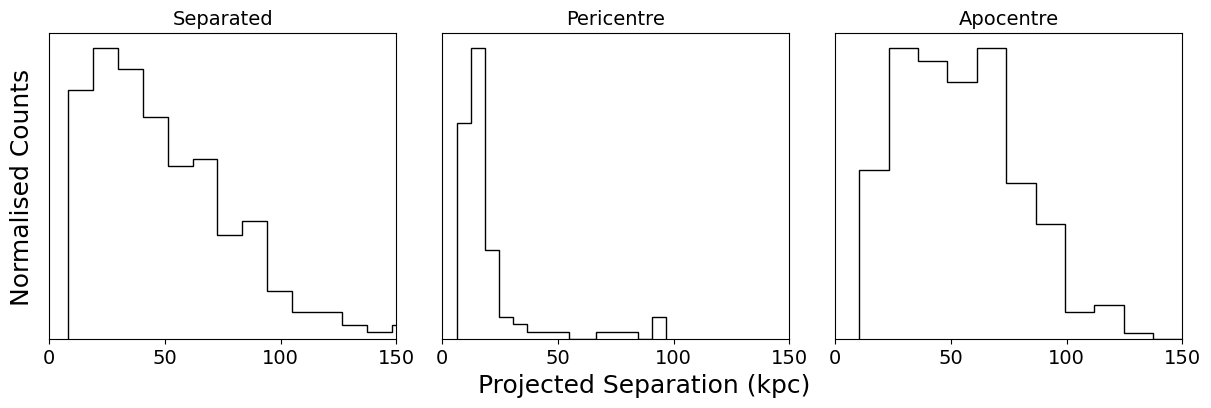

In [62]:
counter = 1
stage_list = ['Separated', 'Pericentre', 'Apocentre']
fig, ax = plt.subplots(ncols = 3, figsize = (12,4))
for i in range(3):
    stage = f'stage{counter}'
    proj_seps = np.array(df_seps.query('prim_cat == @stage').proj_seps)
    proj_seps_double = np.concatenate([proj_seps, proj_seps])

    ax[i].hist(proj_seps_double, bins = 15, histtype='step', color='black', density = True)
    ax[i].set_title(f'{stage_list[i]}', fontsize = 14)
    ax[i].set_xlim([0, 150])
    ax[i].tick_params(left = False, labelleft=False)
    # ax[i].text(115, 65, f'N = {len(proj_seps_double)}', fontsize = 10)
    # ax[i].set_ylim([0,70])
    
    print(len(proj_seps_double))

    counter += 1

fig.tight_layout()
fig.text(-0.01,0.22, 'Normalised Counts', fontsize = 18, rotation = 90, alpha = 1)
fig.text(0.38,-0.01, 'Projected Separation (kpc)', fontsize = 18, alpha = 1)
# fig.savefig(f'{fig_folder}/projected-seps.pdf', bbox_inches = 'tight')
plt.show()

### Checking Volume with Separation

In [63]:
df_seps.head()

,ORyan23_ID_1,ID_Prim,prim_cat,Prim_RA,Prim_Dec,lp_mass_best_prim,ez_sfr_prim,prim_coords,z_prim,ORyan23_ID_2,ID_Sec,sec_cat,Sec_RA,Sec_Dec,lp_mass_best_sec,ez_sfr_sec,sec_coords,z_sec,z_diff,proj_seps
0,4000705547180,1266054,stage1,150.320392,2.620598,10.60467,0.997192,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.995600,4000705547180,1264241,stage1,150.319695,2.618060,10.53484,1.474177,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.982027,0.013573,75.670970
1,4000706649921,840582,stage3,150.061821,2.218277,10.84630,1.745799,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",1.152400,4000706649921,844303,stage3,150.059115,2.219933,11.05237,2.547000,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",1.118725,0.033675,93.820626
2,4000711650343,1082084,stage3,149.956640,2.441887,9.88246,-0.218701,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.318100,4000711650343,1084532,stage3,149.957283,2.438351,10.47155,-0.958259,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.357000,-0.038900,62.400421
4,4000715723468,905466,stage2,150.393574,2.277410,9.69328,0.313347,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.588741,4000715723468,906155,stage2,150.393725,2.277155,9.29240,0.189951,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.616283,-0.027541,7.163353
5,4000716471646,525542,stage3,149.911651,1.925283,9.77660,0.161122,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.747600,4000716471646,525280,stage3,149.912175,1.923344,11.05605,0.543224,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.774127,-0.026527,53.327108


In [64]:
acs_pix = (0.05 * u.arcsec / u.pix).to(u.arcmin / u.pix)

In [65]:
cosmo.kpc_comoving_per_arcmin

<bound method FLRW.kpc_comoving_per_arcmin of FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=None)>

In [66]:
cosmo.kpc_comoving_per_arcmin(1)

<Quantity 960.95688612 kpc / arcmin>

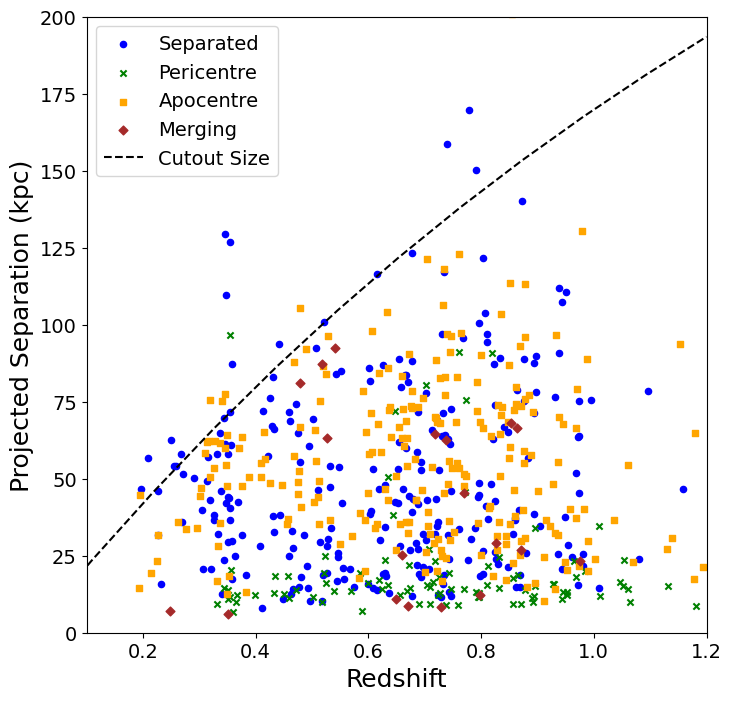

In [67]:
fig, ax = plt.subplots(figsize = (8,8))
colours = ['blue','green','orange', 'brown']
markers = ['o', 'x', 's', 'D']
cutout_size = []
for i in range(4):
    df_seps.query(f'prim_cat == "stage{i+1}"').plot.scatter(
        x = 'z_prim',
        y = 'proj_seps',
        ax = ax, 
        xlim = [0.1,1.2],
        ylim = [0,200],
        color=colours[i],
        marker = markers[i]
    )
    
    counter += 1
    
redshifts = np.linspace(0,1.2,12)

for i in redshifts:
    cutout_size.append(((212.13203 * u.pix) * acs_pix * cosmo.kpc_comoving_per_arcmin(i)).value)
    
ax.plot(redshifts, cutout_size, color = 'black', linestyle = '--')
ax.set_xlabel('Redshift', fontsize = 18)
ax.set_ylabel('Projected Separation (kpc)', fontsize = 18)
ax.legend(['Separated', 'Pericentre', 'Apocentre', 'Merging', 'Cutout Size'], loc= 'upper left')
fig.savefig(f'{fig_folder}/redshift-proj-sep-diagnostic.pdf', bbox_inches = 'tight', dpi = 500)

### Star Formation with Projected Separation

In [68]:
df_seps_red = (
    df_seps[['ORyan23_ID_1', 'ID_Prim', 'ID_Sec', 'z_prim', 'z_sec', 'lp_mass_best_prim', 'lp_mass_best_sec', 'ez_sfr_prim', 'ez_sfr_sec', 'proj_seps', 'prim_cat']]
)

In [69]:
def adding_logs(logx1, logx2):
    x1 = 10**logx1
    x2 = 10**logx2
    x_sum = x1 + x2
    return np.log10(x_sum)

In [70]:
df_sfrs = (
    df_seps_red
    .assign(mass_tot = df_seps_red.apply(lambda row: adding_logs(row.lp_mass_best_prim, row.lp_mass_best_sec), axis = 1))
    .assign(sfr_tot = df_seps_red.apply(lambda row: adding_logs(row.ez_sfr_prim, row.ez_sfr_sec), axis = 1))
)

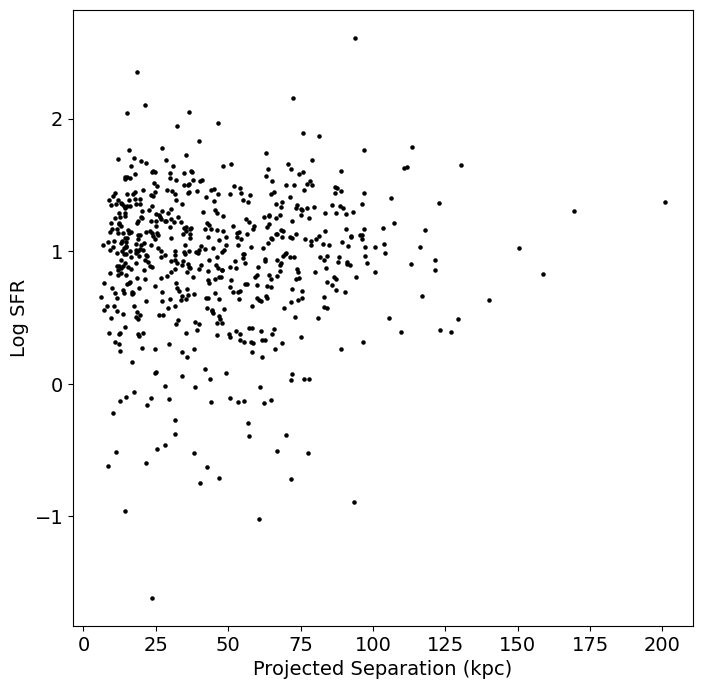

In [71]:
plt.figure(figsize = (8,8))
plt.scatter(df_sfrs.proj_seps, df_sfrs.sfr_tot, s = 5, color = 'black')
plt.xlabel('Projected Separation (kpc)')
plt.ylabel('Log SFR')
plt.show()

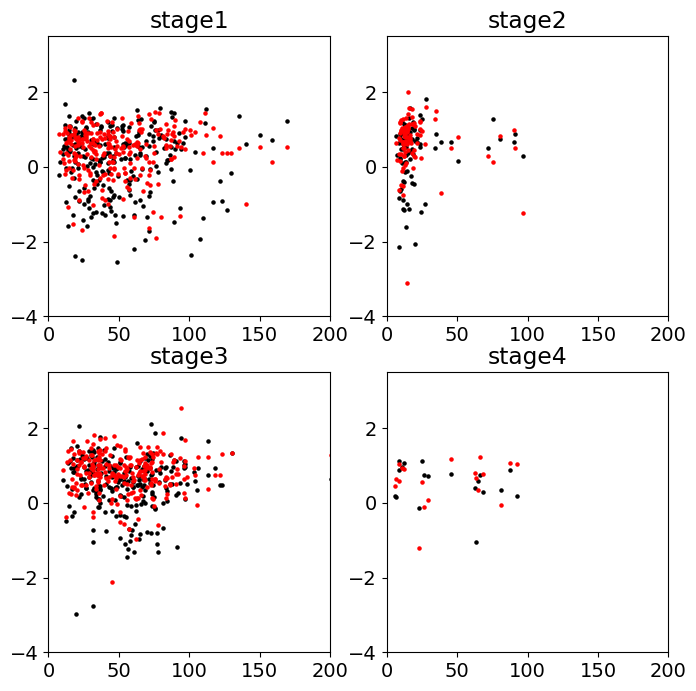

In [46]:
counter = 1
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        stage = f'stage{counter}'
        df_stage = df_sfrs.query('prim_cat == @stage')
        
        ax[i,j].scatter(df_stage.proj_seps, df_stage.ez_sfr_prim, s=5, color='black')
        ax[i,j].scatter(df_stage.proj_seps, df_stage.ez_sfr_sec, s=5, color='red')
        ax[i,j].set_title(stage)
        ax[i,j].set_xlim([0, 200])
        ax[i,j].set_ylim([-4,3.5])
        
        counter += 1

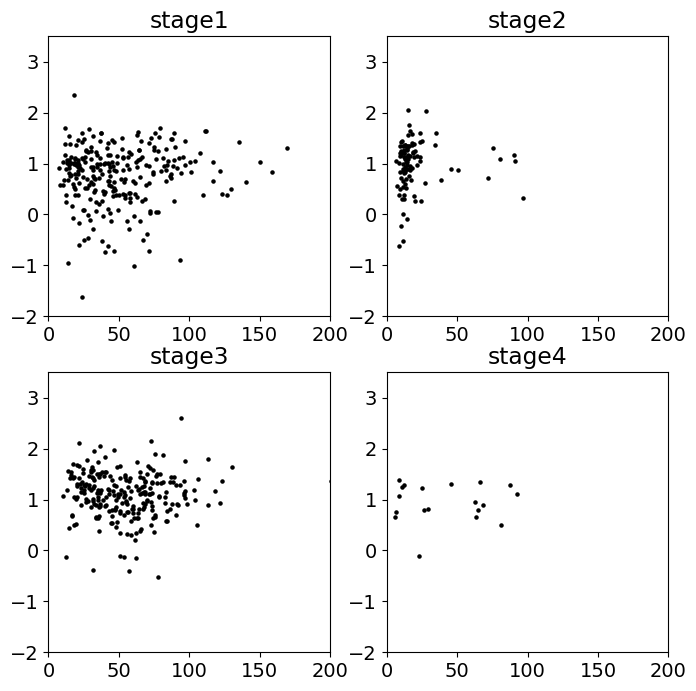

In [47]:
counter = 1
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        stage = f'stage{counter}'
        df_stage = df_sfrs.query('prim_cat == @stage')
        
        ax[i,j].scatter(df_stage.proj_seps, df_stage.sfr_tot, s=5, color='black')
        ax[i,j].set_title(stage)
        ax[i,j].set_xlim([0, 200])
        ax[i,j].set_ylim([-2,3.5])
        
        counter += 1

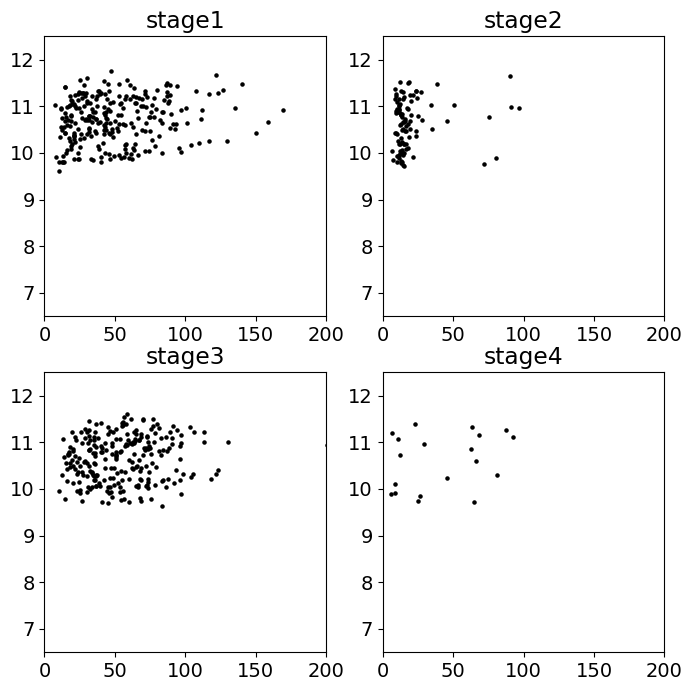

In [48]:
counter = 1
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        stage = f'stage{counter}'
        df_stage = df_sfrs.query('prim_cat == @stage')
        
        ax[i,j].scatter(df_stage.proj_seps, df_stage.mass_tot, s=5, color='black')
        ax[i,j].set_title(stage)
        ax[i,j].set_xlim([0, 200])
        ax[i,j].set_ylim([6.5,12.5])
        
        counter += 1

### Binning Star Formation Rate
Here, I want to just focus on amount of SFR with projected separation. Follow Etkas plots? Hers use SFR enhancement, which sucks a bit. Going to have to just look at change in mean separation, I think

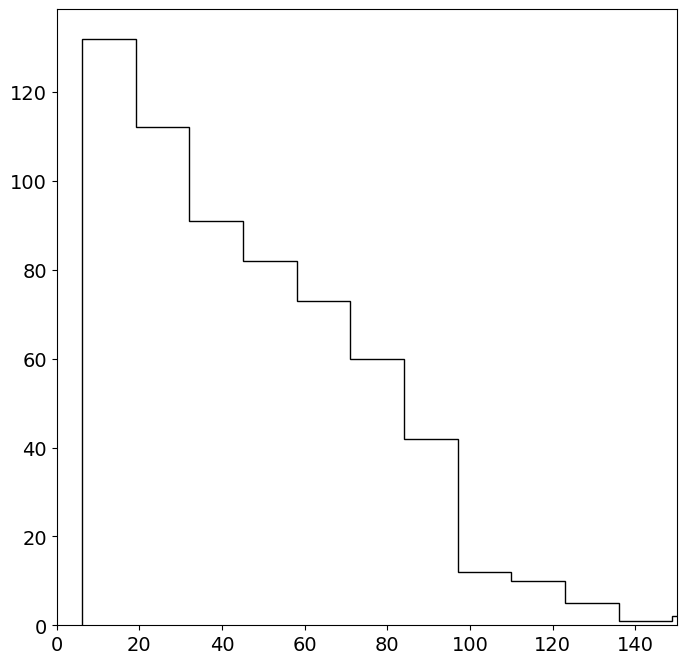

In [49]:
plt.figure(figsize = (8,8))
plt.hist(np.asarray(df_sfrs.proj_seps), bins = 15, histtype='step', color = 'black')
plt.xlim([0,150])
plt.show()

In [50]:
bins = np.linspace(0,150,8)

In [51]:
bins

array([  0.        ,  21.42857143,  42.85714286,  64.28571429,
        85.71428571, 107.14285714, 128.57142857, 150.        ])

In [52]:
df_lin_sfr = df_sfrs.assign(lin_sfr_tot = df_sfrs.sfr_tot.apply(lambda x: 10**x))

In [53]:
sfr_tot = np.zeros(len(bins))
sfr_hist = np.zeros(len(bins))

In [54]:
for i in range(len(bins)-1):
    min_d = bins[i]
    max_d = bins[i+1]
    
    sfr_all_df = df_lin_sfr.query('proj_seps >= @min_d and proj_seps < @max_d')
    
    sfr_hist[i] = len(sfr_all_df)
    sfr_tot[i] = sfr_all_df.lin_sfr_tot.sum()

In [55]:
sfr_avg = sfr_tot / sfr_hist
sfr_avg[np.isnan(sfr_avg)] = 0.0

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


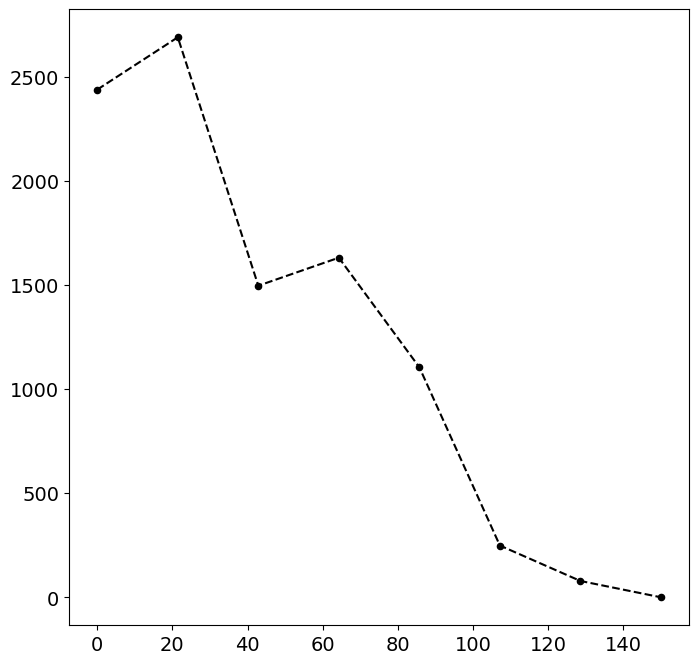

In [56]:
plt.figure(figsize = (8,8))
plt.scatter(bins, sfr_tot, s = 20, color = 'black')
plt.plot(bins, sfr_tot, color = 'black', linestyle='--')
plt.show()

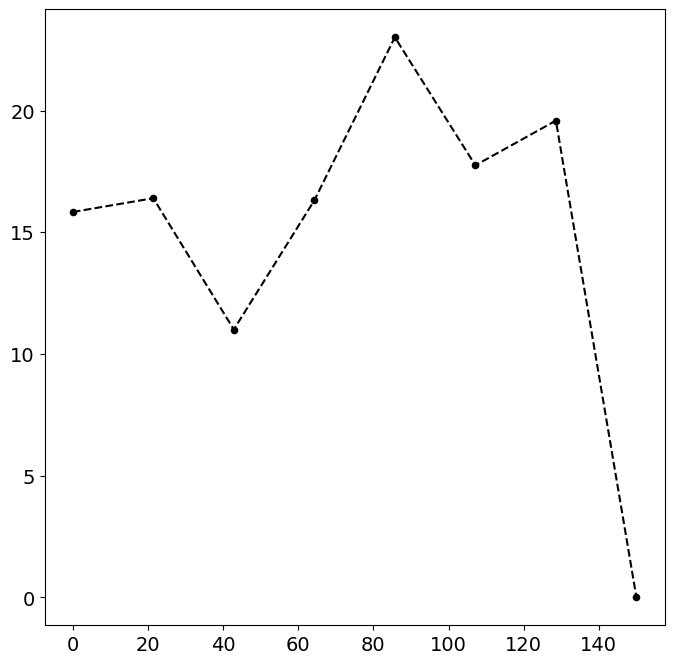

In [57]:
plt.figure(figsize = (8,8))
plt.scatter(bins, sfr_avg, s = 20, color = 'black')
plt.plot(bins, sfr_avg, color = 'black', linestyle='--')
plt.show()

In [58]:
df_sfrs

,ORyan23_ID_1,ID_Prim,ID_Sec,z_prim,z_sec,lp_mass_best_prim,lp_mass_best_sec,ez_sfr_prim,ez_sfr_sec,proj_seps,prim_cat,mass_tot,sfr_tot
0,4000705547180,1266054,1264241,0.995600,0.982027,10.60467,10.53484,0.997192,1.474177,75.670970,stage1,10.872187,1.599150
1,4000706649921,840582,844303,1.152400,1.118725,10.84630,11.05237,1.745799,2.547000,93.820626,stage3,11.262474,2.610728
2,4000711650343,1082084,1084532,0.318100,0.357000,9.88246,10.47155,-0.218701,-0.958259,62.400421,stage3,10.571085,-0.146026
3,4000711824674,1482542,1482412,0.668730,0.732343,9.36047,10.10035,1.463963,0.234238,16.151779,stage3,10.172975,1.488827
4,4000715723468,905466,906155,0.588741,0.616283,9.69328,9.29240,0.313347,0.189951,7.163353,stage2,9.838570,0.557047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,4000775195831_extra,1494892,1492652,0.864567,0.871082,10.90264,9.83544,1.590030,1.005306,78.918954,stage1,10.938336,1.690463
659,4001185630514_extra,1519437,1515868,0.304915,0.343894,9.57472,9.42313,0.335857,-0.188211,39.785656,stage1,9.806536,0.449527
660,4546055995_extra,1520749,1519536,0.647512,0.683219,9.50357,9.41503,0.507741,0.294519,72.033938,stage2,9.762582,0.715116
661,4000927318133_extra,1523385,1518052,0.301645,0.300975,9.53909,9.76102,0.406027,-0.008446,44.323765,stage3,9.965110,0.547495


## Looking at SFR Enhancement

In [59]:
df_prim_cont = pd.read_csv(f'{combine_fold}/primary-control-sample.csv', index_col = 0) 
df_sec_cont = pd.read_csv(f'{combine_fold}/secondary-control-sample.csv', index_col = 0)

In [60]:
def calc_enhance(log_sfr, log_control_sfr):
    sfr = 10 ** log_sfr
    
    if log_control_sfr == 0.0:
        return np.nan
    elif np.isnan(log_control_sfr):
        return np.nan
    
    control_sfr = 10 ** log_control_sfr
    return sfr / control_sfr

In [61]:
df_prim_enh = (
    df_prim_cont
    .assign(sfr_enh = df_prim_cont.apply(lambda row: calc_enhance(row.ez_sfr, row.ez_sfr_cont), axis = 1))
)

df_sec_enh = (
    df_sec_cont
    .assign(sfr_enh = df_sec_cont.apply(lambda row: calc_enhance(row.ez_sfr, row.ez_sfr_cont), axis = 1))
)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == "__main__":


In [62]:
df_prim_enh

,ORyan_ID,ID,lp_mass_best,ez_sfr,z,Prim_RA,Prim_Dec,control_ID,lp_mass_cont,ez_sfr_cont,sfr_enh
0,4000705540519,1324784,8.57956,-0.783763,0.303057,149.699231,2.679556,1407.0,8.57518,-0.939075,1.429922
1,4000705547180,1266054,10.60467,0.997192,0.995600,150.320392,2.620598,11607.0,10.60752,1.397521,0.397806
2,4000706649921,840582,10.84630,1.745799,1.152400,150.061821,2.218277,78056.0,10.84728,1.717686,1.066873
3,4000707046655,214433,6.70360,-1.890665,0.217500,150.227153,1.617348,144765.0,6.70853,-1.967947,1.194763
4,4000707047768,246358,10.63540,0.144319,0.227065,150.200064,1.632469,26947.0,10.63477,-0.795808,8.712182
...,...,...,...,...,...,...,...,...,...,...,...
475,4000854480186,917157,10.18464,0.229133,0.611400,150.044314,2.288238,254046.0,10.17516,0.062293,1.468385
476,4000858402222,1450508,8.00974,-1.172457,0.135300,150.310093,2.801374,52157.0,8.01636,-1.892681,5.250785
477,4000859156914,793415,10.39720,0.951088,0.593900,149.653540,2.173049,3308.0,10.39488,-2.490311,2763.117579
478,4000859744431,1395467,10.03151,1.226215,0.921772,150.234052,2.746578,1655.0,10.02600,0.813517,2.586410


In [63]:
df_enh_sep_1 = df_prim_enh.merge(df_sfrs[['ORyan23_ID_1', 'proj_seps']], left_on = 'ORyan_ID', right_on = 'ORyan23_ID_1', how = 'left')
df_enh_sep_2 = df_sec_enh.merge(df_sfrs[['ORyan23_ID_1', 'proj_seps']], left_on = 'ORyan_ID', right_on = 'ORyan23_ID_1', how = 'left')

In [64]:
df_enh_sep_1

,ORyan_ID,ID,lp_mass_best,ez_sfr,z,Prim_RA,Prim_Dec,control_ID,lp_mass_cont,ez_sfr_cont,sfr_enh,ORyan23_ID_1,proj_seps
0,4000705540519,1324784,8.57956,-0.783763,0.303057,149.699231,2.679556,1407.0,8.57518,-0.939075,1.429922,NaN,NaN
1,4000705547180,1266054,10.60467,0.997192,0.995600,150.320392,2.620598,11607.0,10.60752,1.397521,0.397806,4000705547180,75.670970
2,4000706649921,840582,10.84630,1.745799,1.152400,150.061821,2.218277,78056.0,10.84728,1.717686,1.066873,4000706649921,93.820626
3,4000707046655,214433,6.70360,-1.890665,0.217500,150.227153,1.617348,144765.0,6.70853,-1.967947,1.194763,NaN,NaN
4,4000707047768,246358,10.63540,0.144319,0.227065,150.200064,1.632469,26947.0,10.63477,-0.795808,8.712182,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,4000854480186,917157,10.18464,0.229133,0.611400,150.044314,2.288238,254046.0,10.17516,0.062293,1.468385,4000854480186,33.994232
476,4000858402222,1450508,8.00974,-1.172457,0.135300,150.310093,2.801374,52157.0,8.01636,-1.892681,5.250785,NaN,NaN
477,4000859156914,793415,10.39720,0.951088,0.593900,149.653540,2.173049,3308.0,10.39488,-2.490311,2763.117579,4000859156914,20.020331
478,4000859744431,1395467,10.03151,1.226215,0.921772,150.234052,2.746578,1655.0,10.02600,0.813517,2.586410,4000859744431,34.639346


In [65]:
df_enh = pd.concat([df_enh_sep_1[['ID', 'proj_seps', 'ez_sfr', 'ez_sfr_cont']], df_enh_sep_2[['ID', 'proj_seps', 'ez_sfr', 'ez_sfr_cont']]]).dropna()

In [66]:
places = [5, 15, 35, 75, 112.5, 137.5]

In [67]:
bins = [1, 10, 20, 50, 100, 125, 150]

In [68]:
enh_bins_all = np.zeros(len(bins)-1)
weights_list = []
error_bins_all = np.zeros(len(bins)-1)

for i in range(len(bins)-1):
    min_d = bins[i]
    max_d = bins[i+1]
    
    df_tmp = df_enh.query('proj_seps >= @min_d and proj_seps < @max_d')
    
    control_sfr_tot = 0
    int_sfr_tot = 0
    
    counts = 0
    int_std = []
    control_std = []   
    for j in range(len(df_tmp)):
        
        int_sfr = 10**df_tmp.ez_sfr.iloc[j]
        cont_sfr = 10**df_tmp.ez_sfr_cont.iloc[j]
        
        if int_sfr > 150:
            continue
        elif cont_sfr > 150:
            continue
            
        counts += 1
        
        int_sfr_tot += int_sfr
        control_sfr_tot += cont_sfr
        int_std.append(int_sfr)
        control_std.append(cont_sfr)
        
    if len(df_tmp) < 10:
        enh_bins_all[i] = 0
        continue
        
    int_sfr_mean = int_sfr_tot / counts
    control_sfr_mean = control_sfr_tot / counts
    
    int_sfr_std = np.std(int_std)
    control_sfr_std = np.std(control_std)
    
    weights_list.append(len(df_tmp))
    
    enh_bins_all[i] = int_sfr_mean / control_sfr_mean
    
    upper_error = dist.beta.ppf((1 - int_sfr_mean) / 2, counts+1, len(df_tmp) - counts + 1)
    lower_error = dist.beta.ppf((1 - (1 - int_sfr_mean)) / 2, counts+1, len(df_tmp) - counts + 1)
    
    error_bins_all[i] = (int_sfr_tot / control_sfr_tot) * np.sqrt((int_sfr_std / int_sfr_tot)**2 + (control_sfr_std / control_sfr_tot)**2)
    
    # sys.exit()
    
df_tmp = df_enh.query('proj_seps >= @max_d')
if len(df_tmp) < 10:
    print('Last bin is tiny.')
    enh_bins_all[-1] = 0.0
    error_bins_all[-1] = 0.0
    
int_std = []
control_std = []
control_sfr_tot = 0
int_sfr_tot = 0
counts = 0
for j in range(len(df_tmp)):

    int_sfr = 10**df_tmp.ez_sfr.iloc[j]
    cont_sfr = 10**df_tmp.ez_sfr_cont.iloc[j]

    if int_sfr > 150:
        continue
    elif cont_sfr > 150:
        continue

    int_sfr_tot += int_sfr
    control_sfr_tot += cont_sfr
    
    counts += 1
        
    int_std.append(int_sfr)
    control_std.append(cont_sfr)

int_sfr_mean = int_sfr_tot / counts
control_sfr_mean = control_sfr_tot / counts

int_sfr_std = np.std(int_std)
control_sfr_std = np.std(control_std)

weights_list.append(len(df_tmp))

enh_bins_all[-1] = int_sfr_mean / control_sfr_mean


error_bins_all[-1] = (int_sfr_tot / control_sfr_tot) * np.sqrt((int_sfr_std / int_sfr_tot)**2 + (control_sfr_std / control_sfr_tot)**2)

Last bin is tiny.


C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars


ZeroDivisionError: division by zero

In [69]:
error_bins_all

array([0.23663625, 0.03089724, 0.01574179, 0.01977028, 0.0774777 ,
       0.        ])

In [70]:
weights_list

[16, 112, 206, 218, 25]

In [71]:
places = [5, 15, 35, 75, 112.5, 137.5]

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  


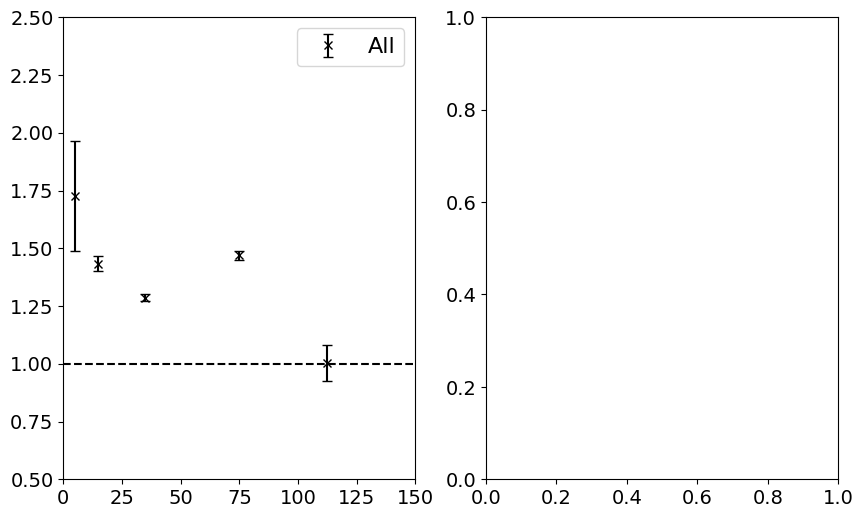

In [72]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,6))
ax[0].errorbar(places, enh_bins_all, color = 'black', marker = 'x', fmt='o', yerr=error_bins_all, label = 'all', capsize = 3.5)
ax[0].legend(['All'],fontsize = 16)
ax[0].axhline(1.0, linestyle = '--', color = 'black')
ax[0].set_xlim([0,150])
ax[0].set_ylim([0.5,2.5])
plt.show()

### Plotting this with Stage

In [73]:
df_cat.head()

,ID,ORyanID_23,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,816891,4000705532455,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-0.000010,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,860686,4000705533383,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,0.000002,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,1301188,4000705539941,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-0.000003,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,1304538,4000705540034,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-0.000006,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,1310001,4000705540064,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-0.000010,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279


In [74]:
df_enh_stage = df_enh.merge(df_cat[['ID', 'category']], on = 'ID', how = 'left')

In [75]:
places = [5, 15, 35, 75, 112.5, 137.5]

In [76]:
bins = [1, 10, 20, 50, 100, 125, 150]

Lengths of list = []
Lengths of list = []
Lengths of list = []


C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:87: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


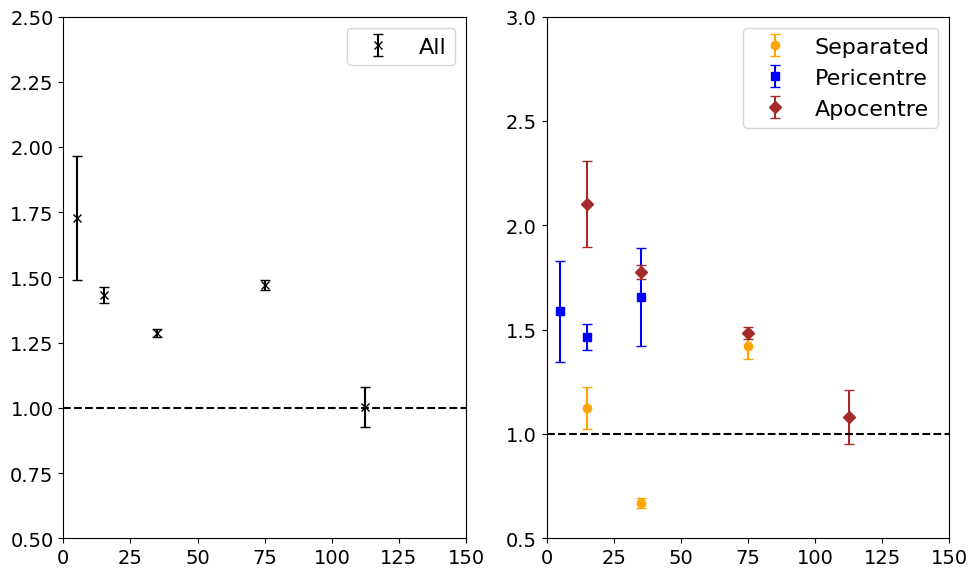

In [77]:
colours = ['black', 'orange', 'blue', 'brown']
# stages = ['stage1','stage2','stage3','stage4']
stages = ['Separated','Pericentre','Apocentre']
markers = ['o', 's', 'D']

# fig, ax = plt.subplots(figsize = (8,8))
for h in range(len(stages)):
    
    df_stage = df_enh_stage.query(f'category == "stage{h+1}"')
    
    enh_bins = np.zeros(len(bins)-1)
    count_bins = np.zeros(len(bins)-1)
    weights_list = []
    error_bins = np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        min_d = bins[i]
        max_d = bins[i+1]

        df_tmp = df_stage.query('proj_seps >= @min_d and proj_seps < @max_d')

        control_sfr_tot = 0
        int_sfr_tot = 0
        int_std = []
        control_std = []
        if len(df_tmp) < 10:
            continue
        for j in range(len(df_tmp)):

            int_sfr = 10**df_tmp.ez_sfr.iloc[j]
            cont_sfr = 10**df_tmp.ez_sfr_cont.iloc[j]

            if int_sfr > 150:
                continue
            elif cont_sfr > 159:
                continue

            int_sfr_tot += int_sfr
            control_sfr_tot += cont_sfr
            
            int_std.append(int_sfr)
            control_std.append(cont_sfr)
        
        int_sfr_mean = int_sfr_tot / len(df_tmp)
        control_sfr_mean = control_sfr_tot / len(df_tmp)
        
        int_sfr_std = np.std(int_std)
        control_sfr_std = np.std(control_std)

        enh_bins[i] = int_sfr_mean / control_sfr_mean
        error_bins[i] = (int_sfr_tot / control_sfr_tot) * np.sqrt((int_sfr_std / int_sfr_tot)**2 + (control_sfr_std / control_sfr_tot)**2)
    
    print(f'Lengths of list = {weights_list}')
    
    df_tmp = df_enh.query('proj_seps >= @max_d')
    if len(df_tmp) < 10:
        enh_bins[-1] = 0.0
        error_bins[-1] = 0.0
    else:
        int_std = []
        control_std = []
        for j in range(len(df_tmp)):

            int_sfr = 10**df_tmp.ez_sfr.iloc[j]
            cont_sfr = 10**df_tmp.ez_sfr_cont.iloc[j]

            if int_sfr > 150:
                continue
            elif cont_sfr > 150:
                continue

            int_sfr_tot += int_sfr
            control_sfr_tot += cont_sfr
            
            int_std.append(int_sfr)
            control_std.append(cont_sfr)

        int_sfr_mean = int_sfr_tot / len(df_tmp)
        control_sfr_mean = control_sfr_tot / len(df_tmp)
        
        int_sfr_std = np.std(int_std)
        control_sfr_std = np.std(control_std)

        enh_bins[-1] = int_sfr_mean / control_sfr_mean
        error_bins[-1] = (int_sfr_tot / control_sfr_tot) * np.sqrt((int_sfr_std / int_sfr_tot)**2 + (control_sfr_std / control_sfr_tot)**2)

    # ax.scatter(places, enh_bins, s = 35, color = colours[h], marker = 'x', label = stages[h])
    ax[1].errorbar(places, enh_bins, yerr=error_bins, fmt='o', color = colours[h+1], marker = markers[h], label = f'Stage {h+1}', capsize = 3.5)
ax[1].legend(['Separated', 'Pericentre', 'Apocentre'],fontsize = 16)
ax[1].axhline(1.0, linestyle = '--', color = 'black')
ax[1].set_xlim([0,150])
ax[1].set_ylim([0.5,3.0])
# ax[1].set_xlabel('Projected Separation (kpc)', fontsize = 18)
# ax[1].set_ylabel('SFR Enhancement', fontsize = 18)
fig.tight_layout()
fig

In [78]:
error_bins

array([0.        , 0.20407341, 0.03276632, 0.02893304, 0.13008313,
       0.        ])

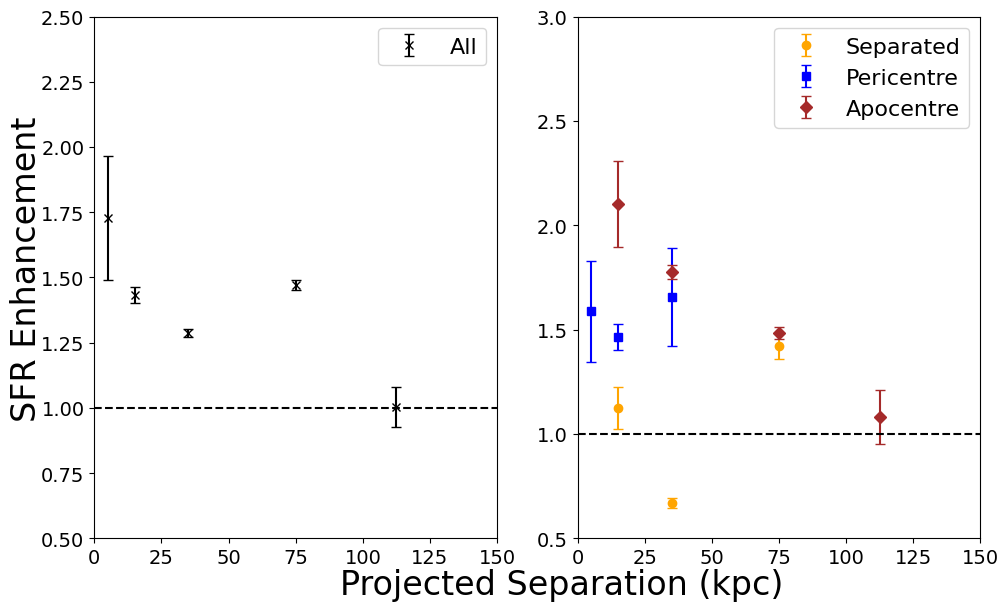

In [79]:
fig.text(-0.01,0.29, 'SFR Enhancement', fontsize = 24, rotation = 90, alpha = 1)
fig.text(0.32,-0.01, 'Projected Separation (kpc)', fontsize = 24, alpha = 1)
fig

In [105]:
fig.savefig(f'{fig_folder}/sfr-enhancement-projected-sep.pdf', bbox_inches='tight')